<a href="https://colab.research.google.com/github/arnavd2001/iiitb_work/blob/main/fitlervisn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://github.com/bnsreenu/python_for_microscopists/blob/master/152-visualizing_conv_layer_outputs.py
#https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/
#https://www.saama.com/different-kinds-convolutional-filters/
#https://www1.icsi.berkeley.edu/~stellayu/publication/doc/2018similarityCVCS.pdf
#https://www.youtube.com/watch?v=16s3Pi1InPU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model

In [3]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()

553476096/553467096 [==============================] - 7s 0us/step


block1_conv1 (3, 3, 3, 64)


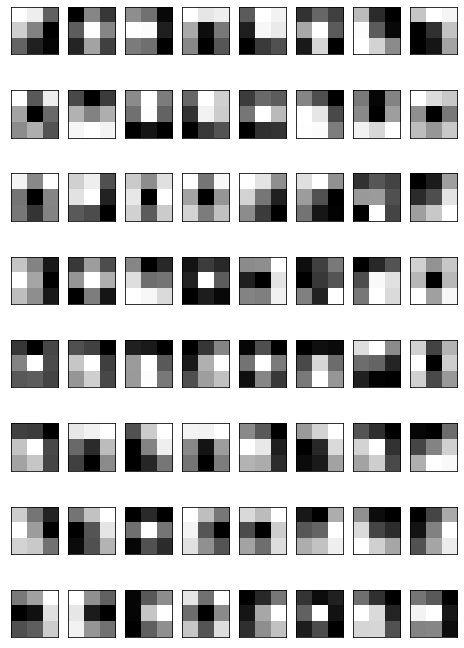

In [4]:
layer = model.layers #Conv layers at 1, 3, 6, 8, 11, 13, 15
filters, biases = model.layers[1].get_weights()
print(layer[1].name, filters.shape)

   
# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :,0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()

In [5]:
#### Now plot filter outputs    

#Define a new truncated model to only include the conv layers of interest
conv_layer_index = [2, 5, 9, 13, 17]
#conv_layer_index = [1, 3, 6]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from keras.preprocessing.image import load_img, img_to_array
img = load_img('image1.jpg', target_size=(224, 224)) #VGG user 224 as input

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
columns = 8
rows = 8
temp = 1 
import os
for ftr in feature_output: #5 baar ghumayega
    pos = 1
    print("Layer :",temp)
    os.mkdir(f'/content/layer{temp}')
    fig=plt.figure(figsize=(14, 14)) #better visibility mentioned 14
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='jet')
        plt.savefig(f'/content/layer{temp}/{i}.png')
        pos += 1
    temp +=1
    plt.show()


Layer : 1


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



KeyboardInterrupt

The above exception was the direct cause of the following exception:

SystemError: <built-in method write of _io.BufferedWriter object at 0x7f306d06fdd0> returned a result with an error set

The above exception was the direct cause of the following exception:

SystemError: <built-in method write of _io.BufferedWriter object at 0x7f306d06fdd0> returned a result with an error set

The above exception was the direct cause of the following exception:

SystemError: <built-in method write of _io.FileIO object at 0x7f306cdb6050> returned a result with an error set

The above exception was the direct cause of the following exception:

SystemError: <built-in method write of _io.BufferedWriter object at 0x7f306d06fdd0> returned a result with an error set

The above exception was the direct cause of the following exception:

SystemError: <built-in method write of _io.BufferedWriter object at 0x7f306d06fdd0> returned a result with an error set

The above exception was the direct

TypeError: ignored

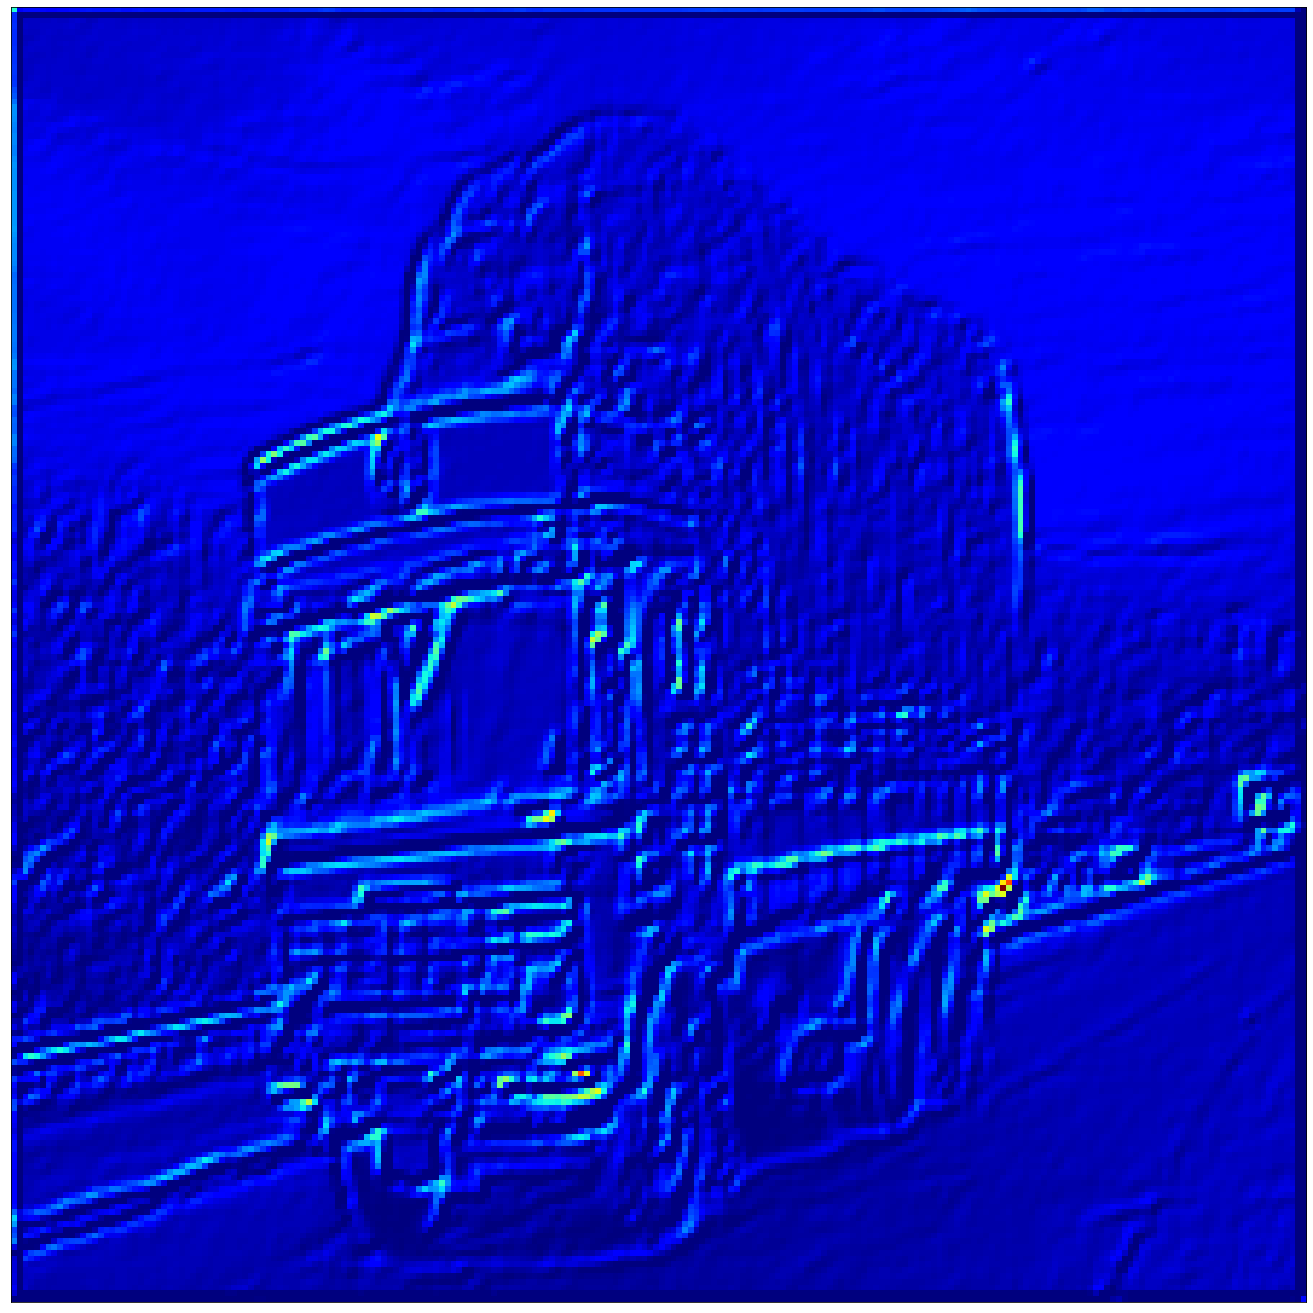

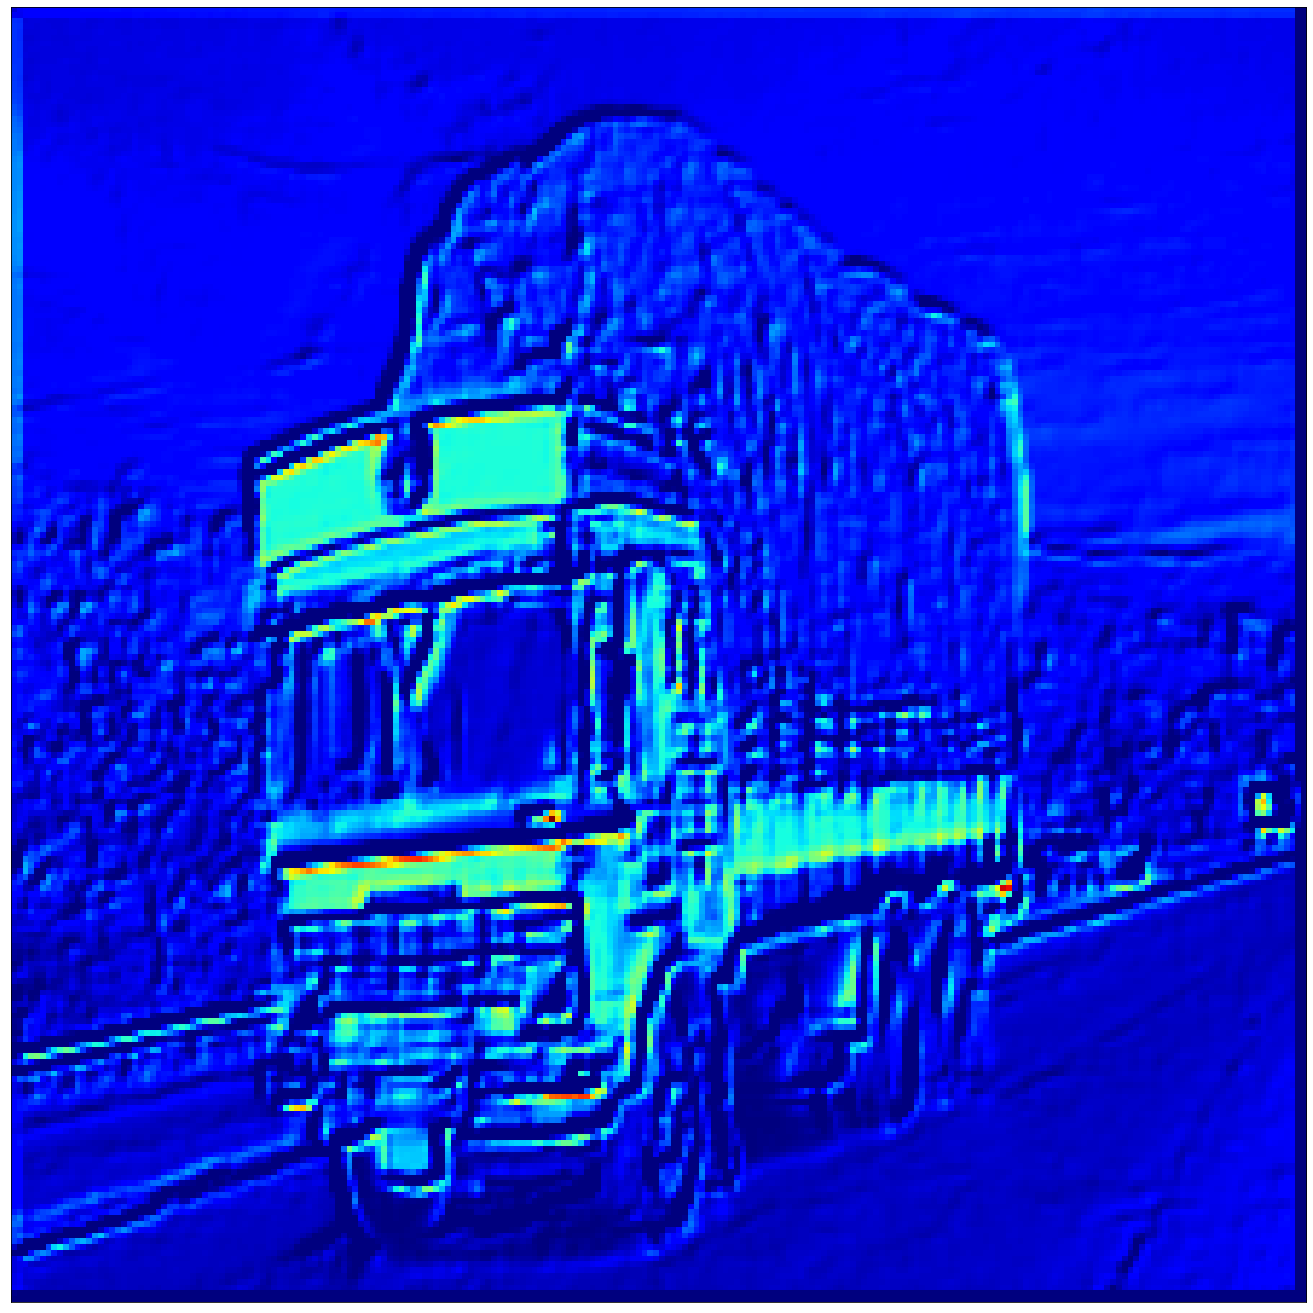

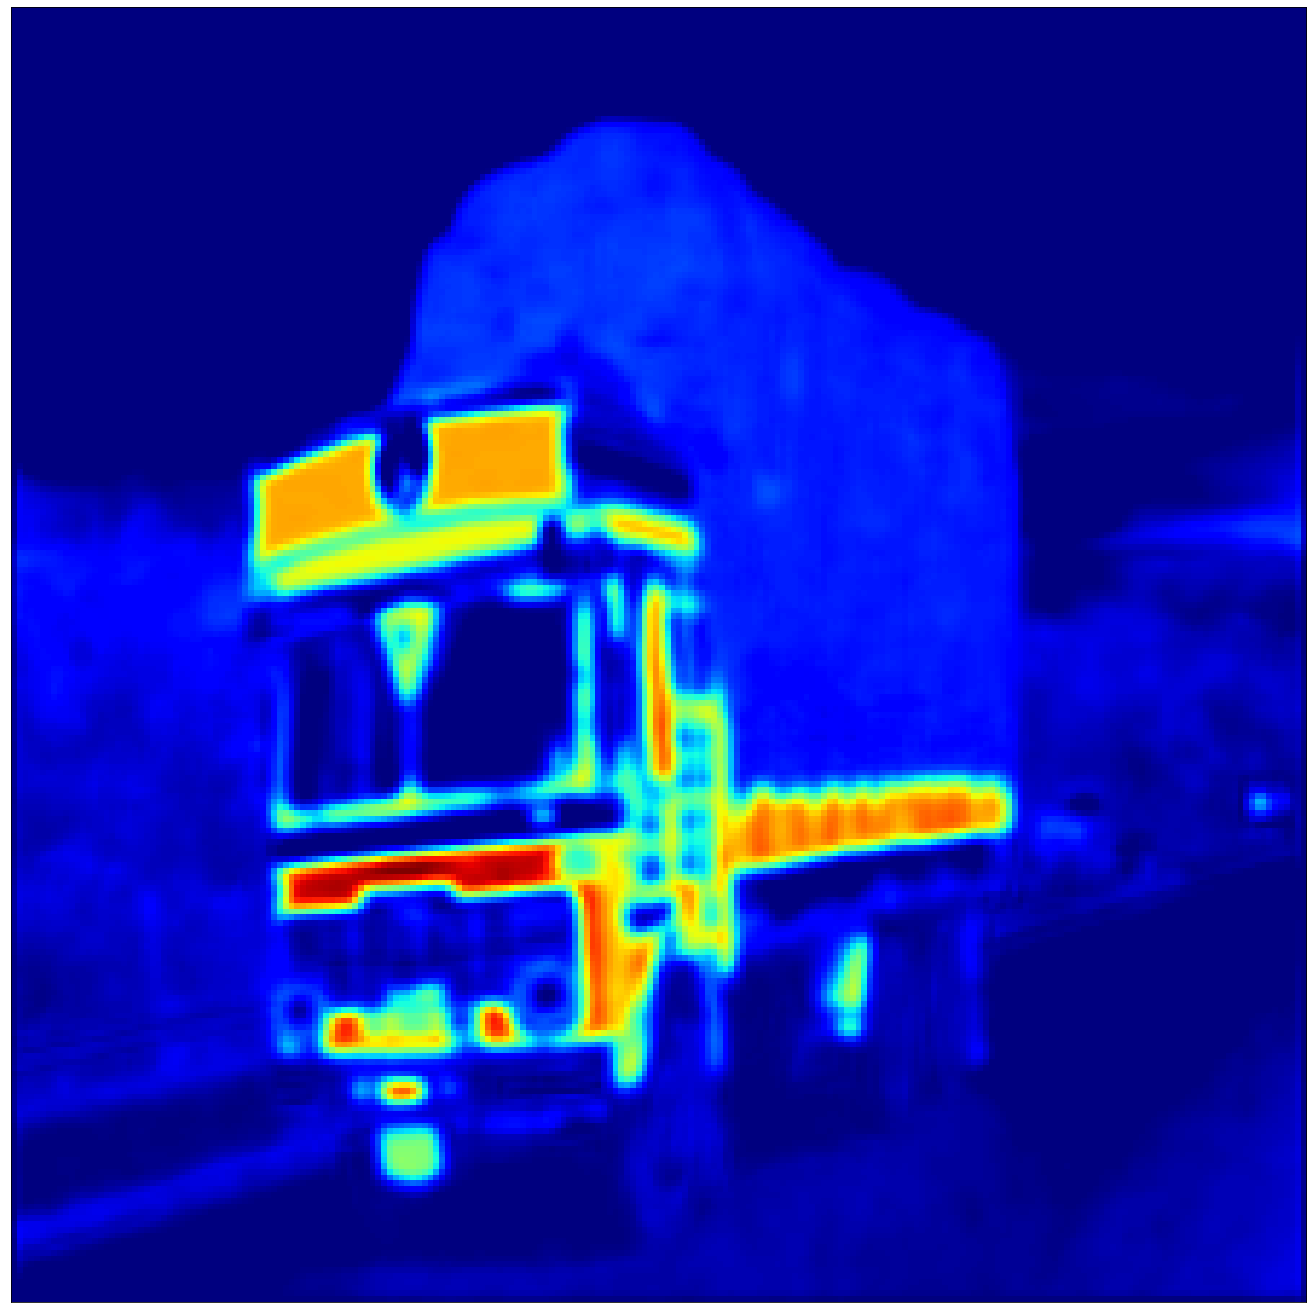

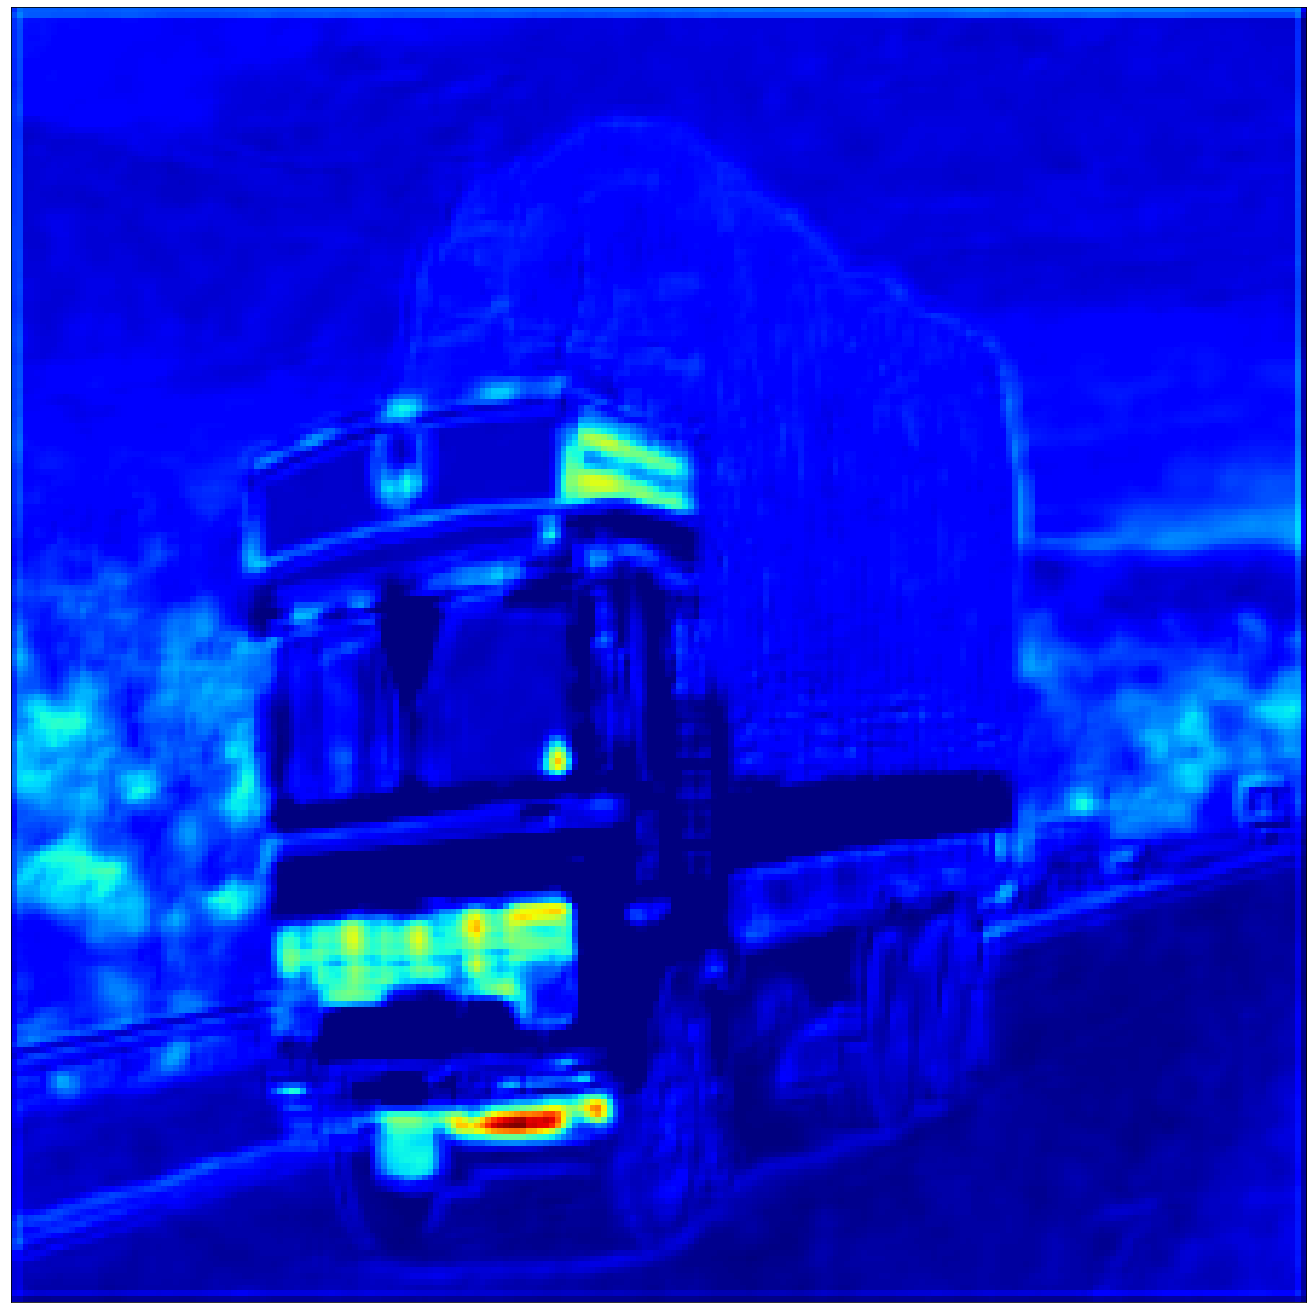

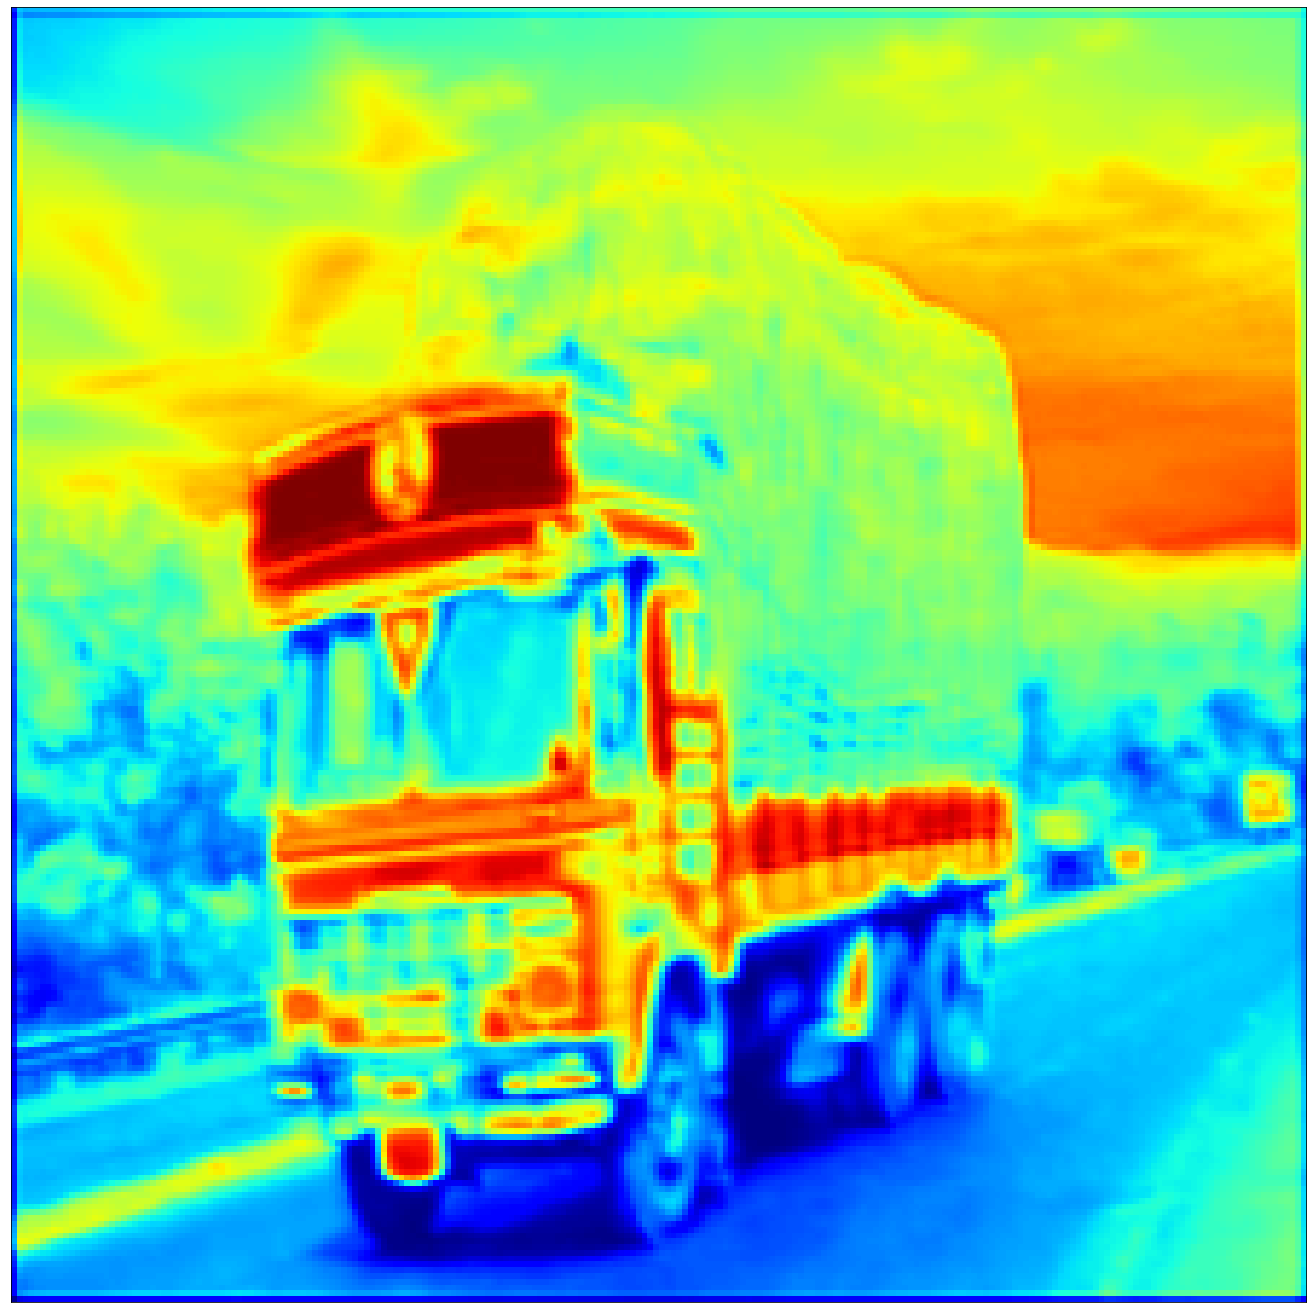

In [ ]:
columns = 8
rows = 8
temp = 1 
import os
for ftr in feature_output: #5 baar ghumayega
    pos = 1
    print("Layer :",temp)
    os.mkdir(f'/content/layer{temp}')
    for i in range(1, columns*rows +1):
        fig=plt.figure(figsize=(224, 224)) #better visibility mentioned 14
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='jet')
        plt.savefig(f'/content/layer{temp}/{i}.png')
        pos += 1
    temp +=1
    plt.show()